In [73]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime 
import matplotlib.pyplot as plt
% matplotlib inline 

In [74]:
bookings = pd.read_csv('drive-download-20180422T230536Z-001/conversations_conversation.csv')
bookings.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN
2,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaN
3,208297,2017-06-20,2017-06-25,5,2017-06-10 10:13:55.357196,420,provider,64413,87158,2017-06-15 15:00:33.124108,2017-06-18 00:06:25.278723
4,208298,2017-05-25,2017-05-28,3,2017-05-15 10:00:03.702143,66,NaN,64411,82832,2017-05-16 00:40:10.332902,NaN


# 1. What is the daily booking rate for each of the 90 days prior to the snapshot (2017-07-01) Is there a downward trend?


In [75]:
#Will need to convert the booking information into a datetime objects.
bookings.dtypes

id                     int64
start_date            object
end_date              object
units                  int64
added                 object
booking_total          int64
cancellation_fault    object
requester_id           int64
service_id             int64
booked_at             object
cancelled_at          object
dtype: object

In [76]:
#Creating all the datetime objects.
bookings['start_date'] = pd.to_datetime(bookings['start_date'])
bookings['end_date'] = pd.to_datetime(bookings['end_date'])
bookings['added'] = pd.to_datetime(bookings['added'])
bookings['booked_at'] = pd.to_datetime(bookings['booked_at'])
bookings['cancelled_at'] = pd.to_datetime(bookings['cancelled_at'])

In [77]:
bookings.dtypes

id                             int64
start_date            datetime64[ns]
end_date              datetime64[ns]
units                          int64
added                 datetime64[ns]
booking_total                  int64
cancellation_fault            object
requester_id                   int64
service_id                     int64
booked_at             datetime64[ns]
cancelled_at          datetime64[ns]
dtype: object

In [78]:
bookings.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaT
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaT,NaT
2,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaT
3,208297,2017-06-20,2017-06-25,5,2017-06-10 10:13:55.357196,420,provider,64413,87158,2017-06-15 15:00:33.124108,2017-06-18 00:06:25.278723
4,208298,2017-05-25,2017-05-28,3,2017-05-15 10:00:03.702143,66,NaN,64411,82832,2017-05-16 00:40:10.332902,NaT


In [79]:
#What we are really looking for is the time between added and booked at. 
#This is the difference between when the conversation was started and when it was booked.
#Lets create a dataframe off these two.

In [80]:
time_to_book = bookings[['added', 'booked_at']].copy()
time_to_book.head(2)

,added,booked_at
0,2017-05-25 17:06:35.796792,2017-05-26 21:02:09.499404
1,2017-07-07 06:07:08.053227,NaT


In [81]:
#Need to get rid of all the extraneaous timestamps it just clutters things up.

In [84]:
time_to_book['added'] = time_to_book['added'].dt.date
time_to_book['booked_at'] = time_to_book['booked_at'].dt.date
time_to_book.head(10)

,added,booked_at
0,2017-05-25,2017-05-26
1,2017-07-07,NaN
2,2017-05-26,2017-05-29
3,2017-06-10,2017-06-15
4,2017-05-15,2017-05-16
5,2017-06-16,2017-06-17
6,2017-06-04,NaN
7,2017-06-28,NaN
8,2017-05-22,2017-05-24
9,2017-06-02,NaN


In [85]:
window = 90
end_date = datetime(2017,7,11)
past_time_period = end_date - dt.timedelta(days=window)
past_time_period

datetime.datetime(2017, 4, 12, 0, 0)

In [86]:
#This is what we are trying to forecast, the time period between 2017-04-12 adn 2017-07-11.

In [87]:
start_date = datetime(2017,4,12)

In [88]:
end_date = datetime.date(end_date)
start_date = datetime.date(start_date)

In [90]:
#Spot Check
start_date, end_date

(datetime.date(2017, 4, 12), datetime.date(2017, 7, 11))

In [91]:
mask = (time_to_book['added'] > start_date) & (time_to_book['added'] <= end_date)

In [92]:
what_we_want = time_to_book[mask]
what_we_want.head(10)

,added,booked_at
0,2017-05-25,2017-05-26
1,2017-07-07,NaN
2,2017-05-26,2017-05-29
3,2017-06-10,2017-06-15
4,2017-05-15,2017-05-16
5,2017-06-16,2017-06-17
6,2017-06-04,NaN
7,2017-06-28,NaN
8,2017-05-22,2017-05-24
9,2017-06-02,NaN


In [93]:
what_we_want['total_count'] = what_we_want['added'].copy()
what_we_want.head()

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,added,booked_at,total_count
0,2017-05-25,2017-05-26,2017-05-25
1,2017-07-07,NaN,2017-07-07
2,2017-05-26,2017-05-29,2017-05-26
3,2017-06-10,2017-06-15,2017-06-10
4,2017-05-15,2017-05-16,2017-05-15


In [94]:
count_conversations = what_we_want.groupby('added', as_index=False).count()
count_conversations.head()

,added,booked_at,total_count
0,2017-04-13,103,226
1,2017-04-14,93,213
2,2017-04-15,87,213
3,2017-04-16,94,206
4,2017-04-17,84,207


In [95]:
count_conversations['booking_rate'] = (count_conversations.booked_at / count_conversations.total_count)*100

In [96]:
count_conversations.head()

,added,booked_at,total_count,booking_rate
0,2017-04-13,103,226,45.575221
1,2017-04-14,93,213,43.661972
2,2017-04-15,87,213,40.845070
3,2017-04-16,94,206,45.631068
4,2017-04-17,84,207,40.579710


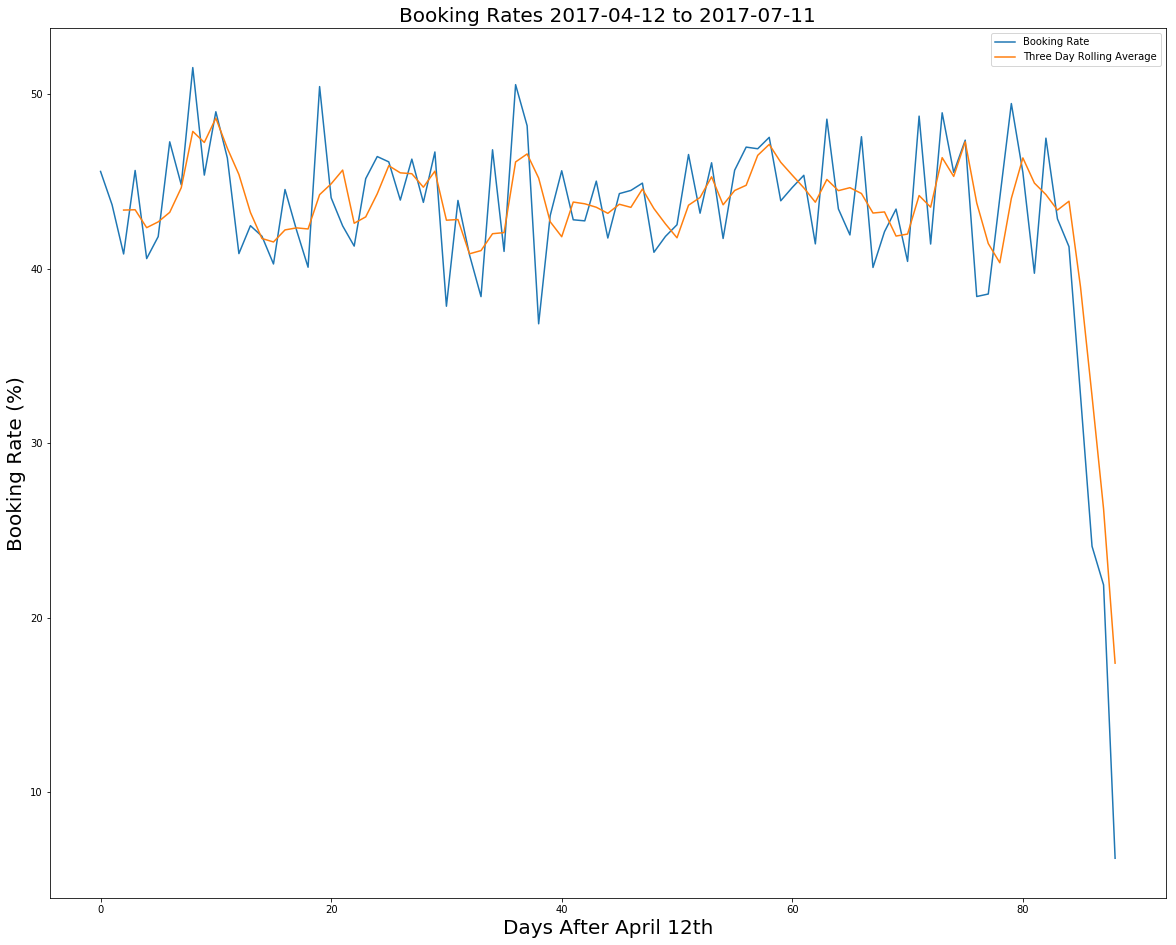

In [115]:
fig = plt.figure(figsize=(20,16))
plt.plot(count_conversations['booking_rate'], label='Booking Rate')
plt.plot(count_conversations['booking_rate'].rolling(3).mean(), label = 'Three Day Rolling Average')
#plt.plot(count_conversations['booking_rate'].rolling(5).mean(), label = 'Five Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Days After April 12th', fontsize=20)
plt.title('Booking Rates 2017-04-12 to 2017-07-11',fontsize=20)
plt.legend();

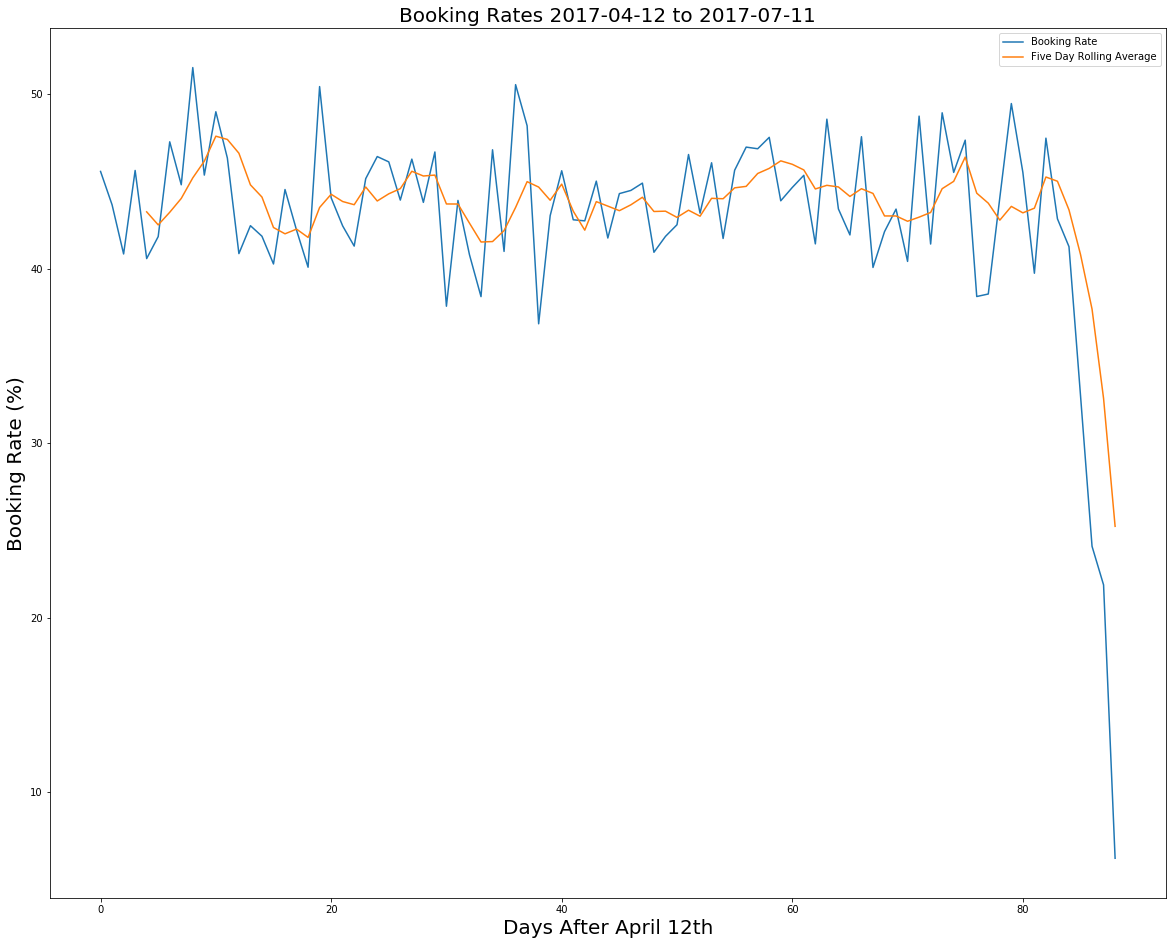

In [116]:
fig = plt.figure(figsize=(20,16))
plt.plot(count_conversations['booking_rate'], label='Booking Rate')
#plt.plot(count_conversations['booking_rate'].rolling(3).mean(), label = 'Three Day Rolling Average')
plt.plot(count_conversations['booking_rate'].rolling(5).mean(), label = 'Five Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Days After April 12th', fontsize=20)
plt.title('Booking Rates 2017-04-12 to 2017-07-11',fontsize=20)
plt.legend();

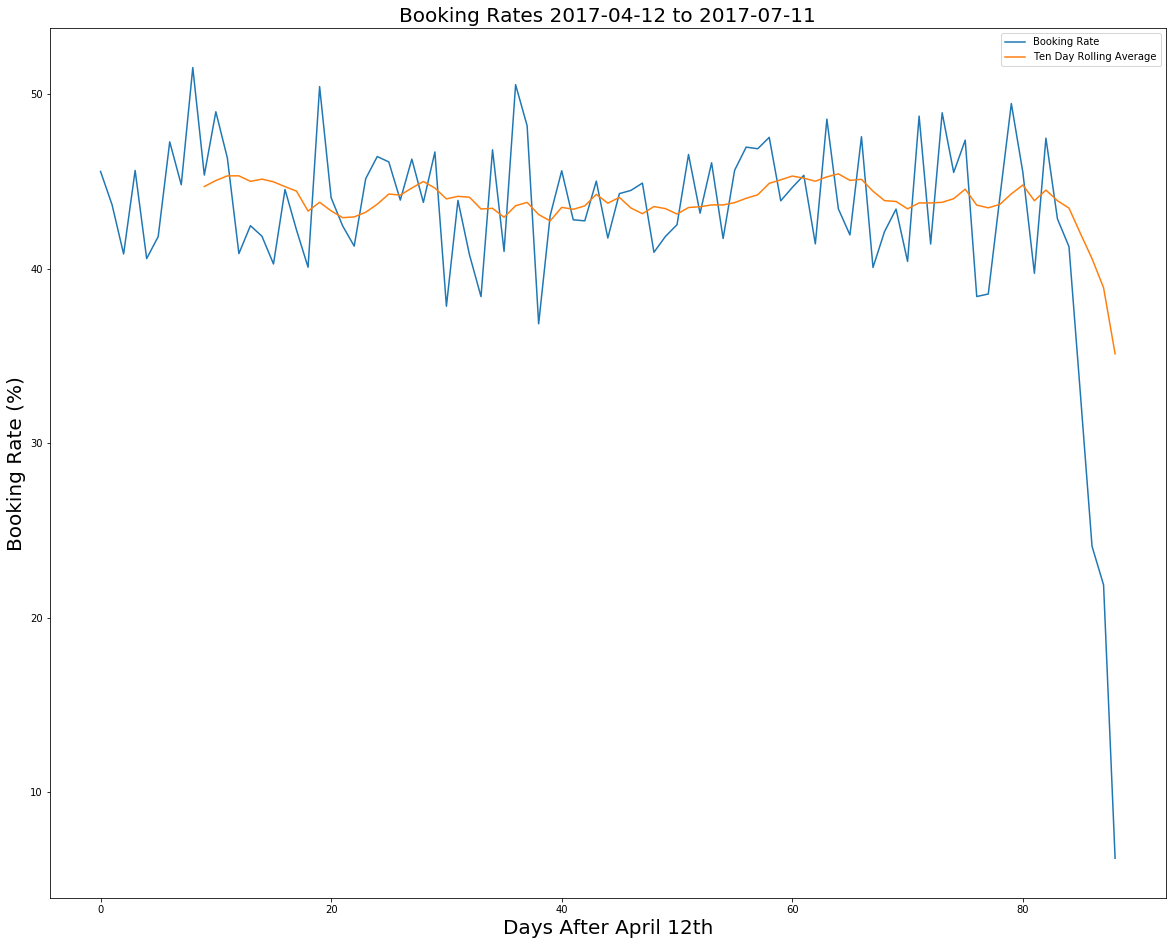

In [117]:
fig = plt.figure(figsize=(20,16))
plt.plot(count_conversations['booking_rate'], label='Booking Rate')
#plt.plot(count_conversations['booking_rate'].rolling(3).mean(), label = 'Three Day Rolling Average')
#plt.plot(count_conversations['booking_rate'].rolling(5).mean(), label = 'Five Day Rolling Average')
plt.plot(count_conversations['booking_rate'].rolling(10).mean(), label = 'Ten Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Days After April 12th', fontsize=20)
plt.title('Booking Rates 2017-04-12 to 2017-07-11',fontsize=20)
plt.legend();

In [119]:
count_conversations.head()

,added,booked_at,total_count,booking_rate
0,2017-04-13,103,226,45.575221
1,2017-04-14,93,213,43.661972
2,2017-04-15,87,213,40.845070
3,2017-04-16,94,206,45.631068
4,2017-04-17,84,207,40.579710


In [120]:
count_conversations.booking_rate.mean()

43.004557462629045

It appears that the average booking rate for the time period in question is ~43% .

# 2. Can you narrate a reason why this trend exists? Is there a reason to be concerned?

The average booking rate for the 90 day window spanning 2017-04-12 and 2017-07-11 is roughly 43%. There does seem to be a downward trend as evidneced by the graph above. I however would not be concerned beacuese it takes a couple of days of talking i.e. when the conversation is added to the dataframe and when the booking actaully closes. The reason we see a drop off rate is due to the fact that some conversations have started but have not quite yet resulted in a booking. 

# 3. Taking a look at the entire data set, want to see if period in question is unique.

In [124]:
time_to_book['total'] = time_to_book['added'].copy()
time_to_book.head()

,added,booked_at,total
0,2017-05-25,2017-05-26,2017-05-25
1,2017-07-07,NaN,2017-07-07
2,2017-05-26,2017-05-29,2017-05-26
3,2017-06-10,2017-06-15,2017-06-10
4,2017-05-15,2017-05-16,2017-05-15


In [125]:
running_total = time_to_book.groupby('added', as_index=False).count()
running_total.head()

,added,booked_at,total
0,2015-07-18,1,1
1,2015-07-19,1,2
2,2015-07-20,1,2
3,2015-07-21,0,2
4,2015-07-23,0,1


In [127]:
running_total['booking_rate'] = (running_total.booked_at / running_total.total) * 100
running_total.head()

,added,booked_at,total,booking_rate
0,2015-07-18,1,1,100.0
1,2015-07-19,1,2,50.0
2,2015-07-20,1,2,50.0
3,2015-07-21,0,2,0.0
4,2015-07-23,0,1,0.0


In [128]:
#Looks like some pretty intense variation, lets plot.

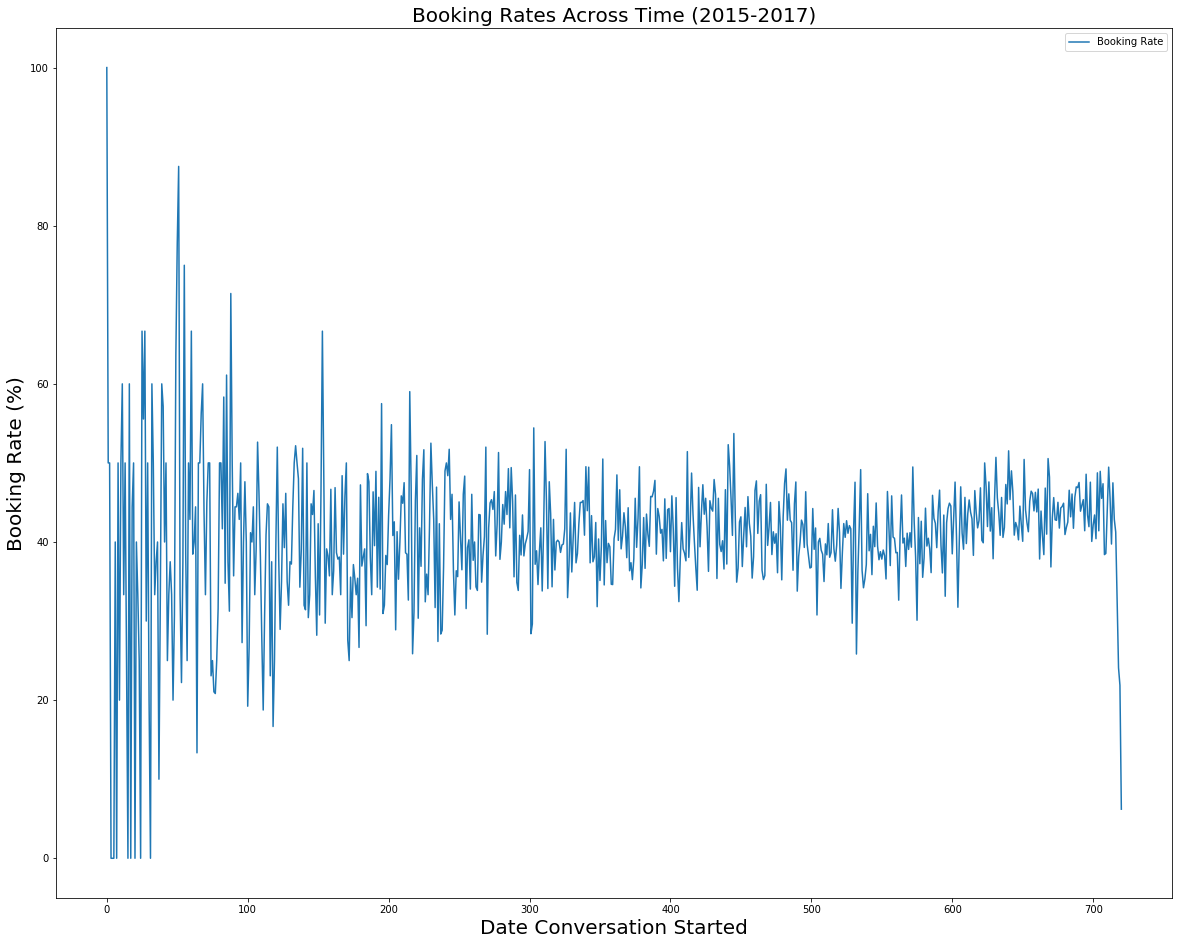

In [129]:
fig = plt.figure(figsize=(20,16))
plt.plot(running_total['booking_rate'], label='Booking Rate')
#plt.plot(count_conversations['booking_rate'].rolling(3).mean(), label = 'Three Day Rolling Average')
#plt.plot(count_conversations['booking_rate'].rolling(5).mean(), label = 'Five Day Rolling Average')
#plt.plot(running_total['booking_rate'].rolling(10).mean(), label = 'Ten Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Date Conversation Started', fontsize=20)
plt.title('Booking Rates Across Time (2015-2017)',fontsize=20)
plt.legend();

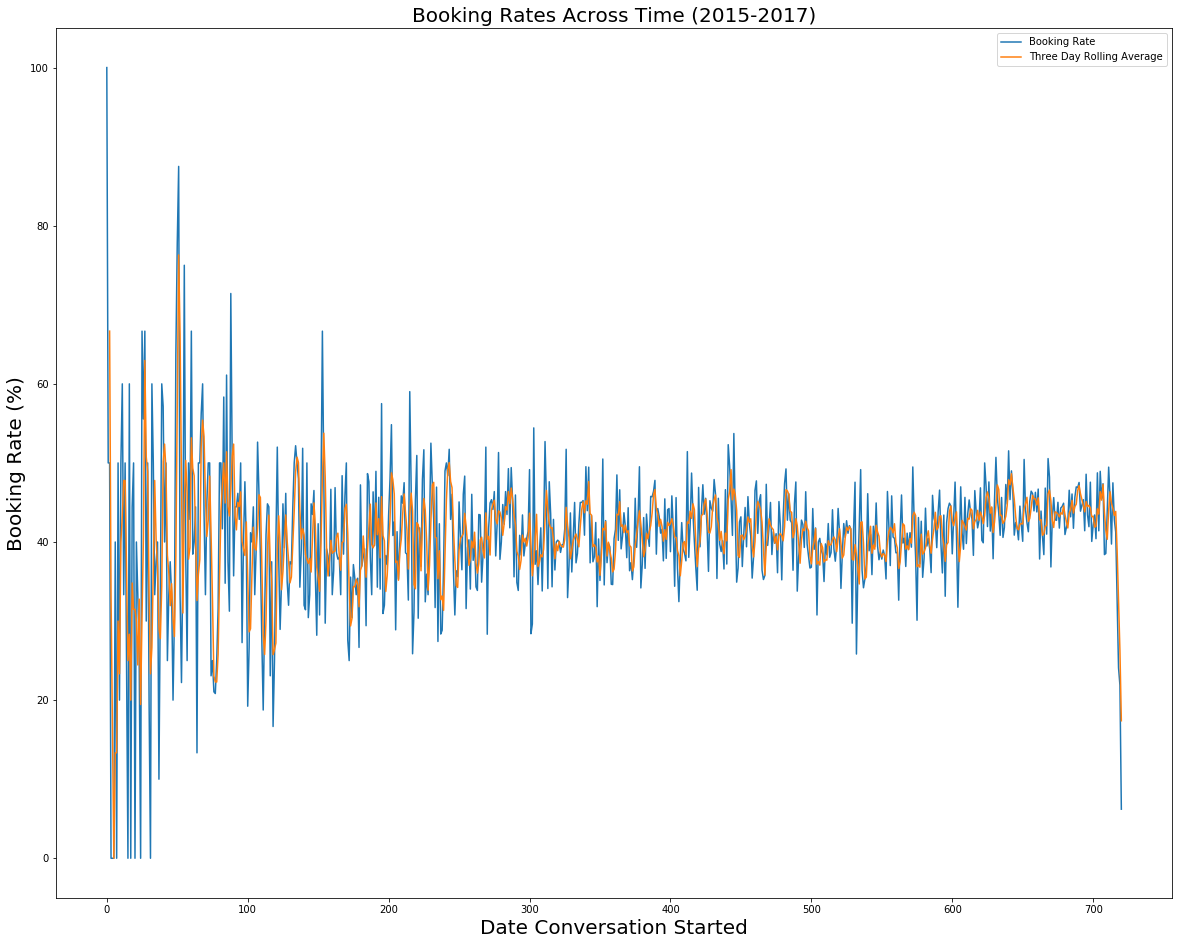

In [133]:
fig = plt.figure(figsize=(20,16))
plt.plot(running_total['booking_rate'], label='Booking Rate')
plt.plot(running_total['booking_rate'].rolling(3).mean(), label = 'Three Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Date Conversation Started', fontsize=20)
plt.title('Booking Rates Across Time (2015-2017)',fontsize=20)
plt.legend();

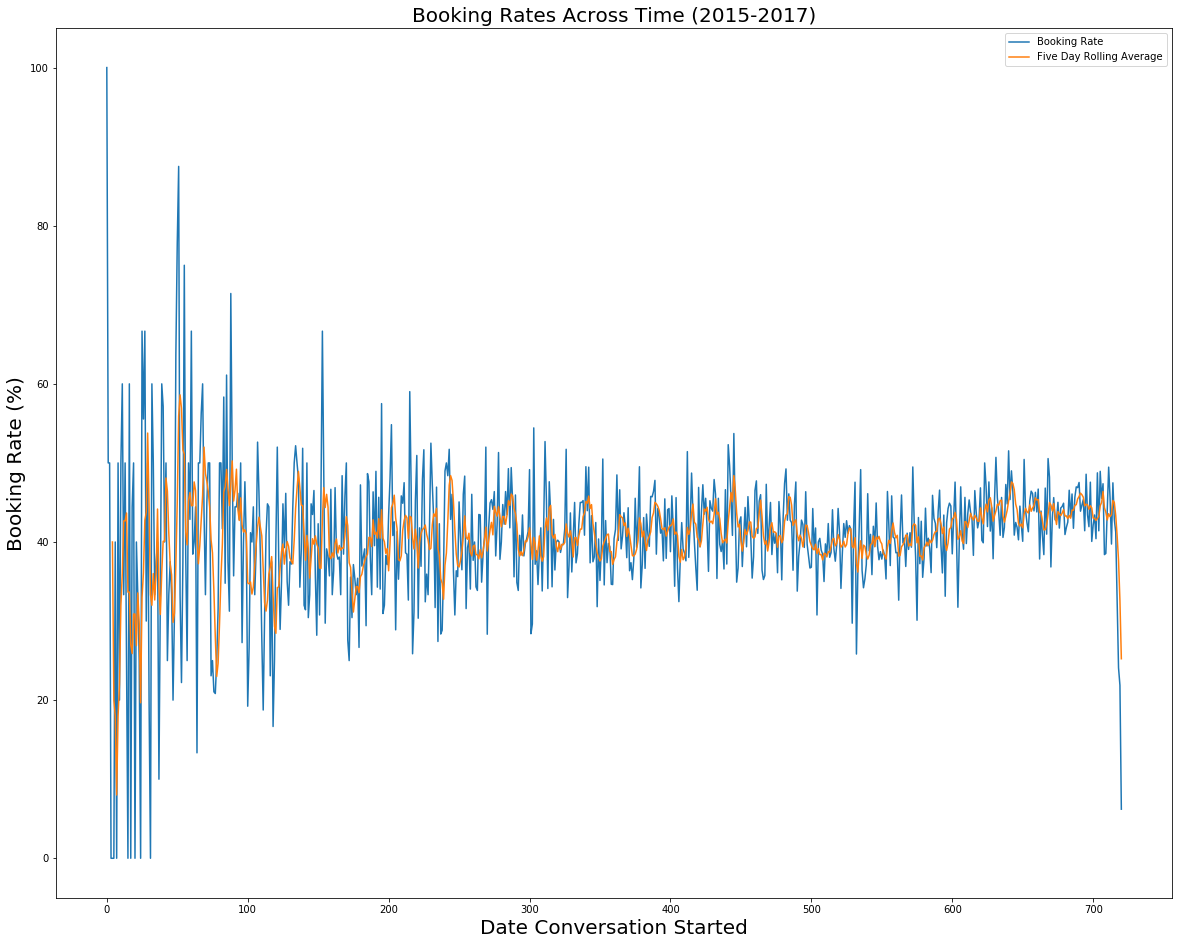

In [134]:
fig = plt.figure(figsize=(20,16))
plt.plot(running_total['booking_rate'], label='Booking Rate')
plt.plot(running_total['booking_rate'].rolling(5).mean(), label = 'Five Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Date Conversation Started', fontsize=20)
plt.title('Booking Rates Across Time (2015-2017)',fontsize=20)
plt.legend();

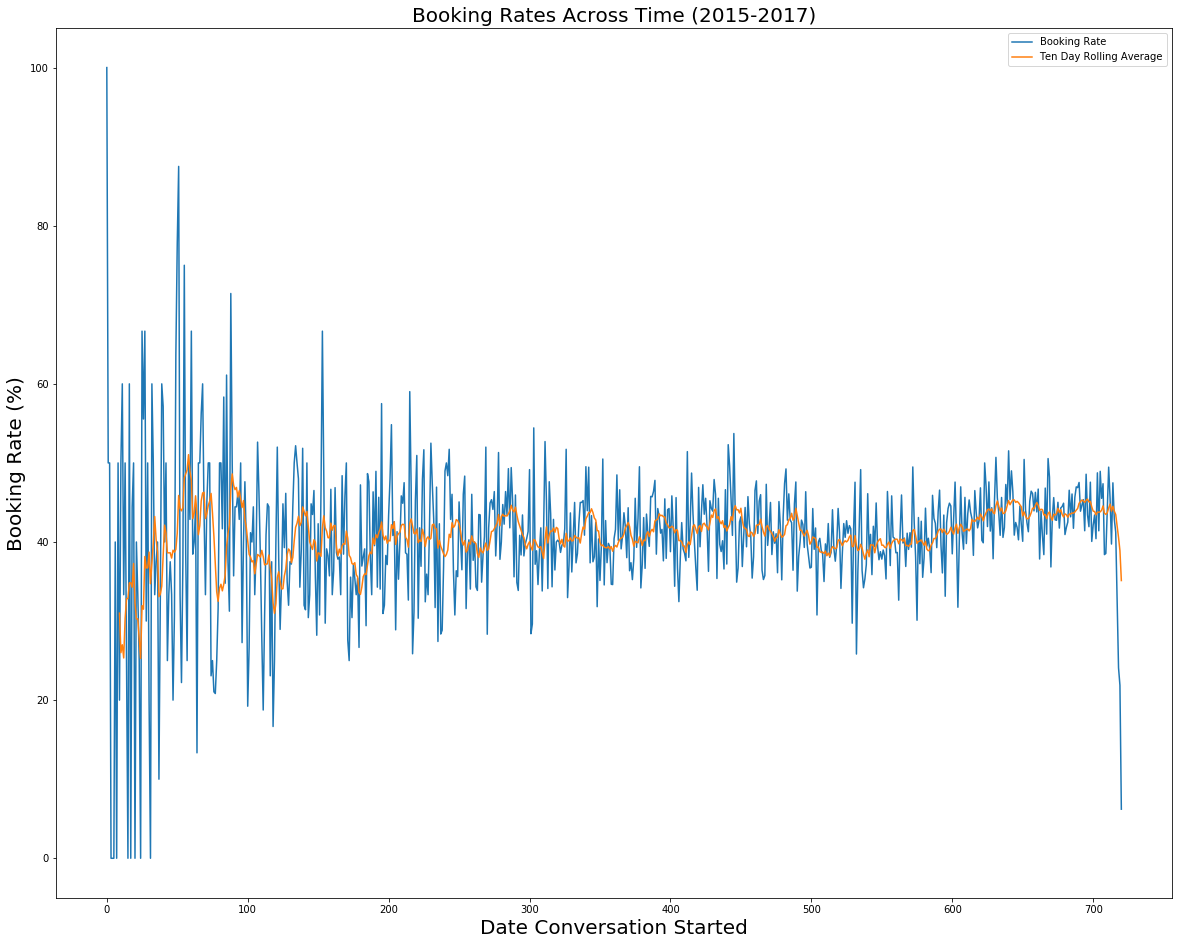

In [135]:
fig = plt.figure(figsize=(20,16))
plt.plot(running_total['booking_rate'], label='Booking Rate')
plt.plot(running_total['booking_rate'].rolling(10).mean(), label = 'Ten Day Rolling Average')
plt.ylabel('Booking Rate (%)', fontsize=20)
plt.xlabel('Date Conversation Started', fontsize=20)
plt.title('Booking Rates Across Time (2015-2017)',fontsize=20)
plt.legend();

In [137]:
#Lets figure out the actual time difference for the bookings. 

In [138]:
time_to_book['delta'] = (time_to_book.booked_at - time_to_book.added)
time_to_book.head()

,added,booked_at,total,delta
0,2017-05-25,2017-05-26,2017-05-25,1 days
1,2017-07-07,NaN,2017-07-07,NaT
2,2017-05-26,2017-05-29,2017-05-26,3 days
3,2017-06-10,2017-06-15,2017-06-10,5 days
4,2017-05-15,2017-05-16,2017-05-15,1 days


In [139]:
time_to_book.delta.value_counts()

2 days     7263
3 days     6936
4 days     5436
1 days     5126
5 days     3665
6 days     2166
7 days     1128
0 days      735
8 days      451
9 days      149
10 days      30
11 days       3
12 days       2
Name: delta, dtype: int64

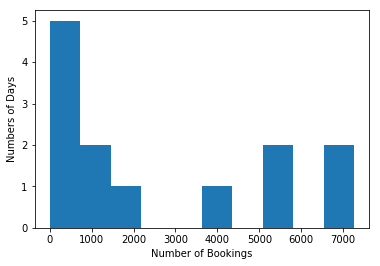

In [148]:
plt.hist(time_to_book.delta.value_counts());
plt.xlabel('Number of Bookings')
plt.ylabel("Numbers of Days")

In [141]:
mean_delta = time_to_book.delta.mean()
mean_delta

Timedelta('3 days 05:24:30.679963')

This further supports our findings above, we saw the drop off at the end of the window and this is because it takes about 3 days for a booking to materialize. 

Therefore I would not be concerned the right end of the chart.

# Addtional Analysis 

After 5 days of talking it really seems as if the booking rate and number of bookings drops quite quickly, I would want to see what were the leading causes behind that?

Days 1-4 of talking seem to be the most fruitful; what's the content of those messages and how quickly are pet owners and service providers responding to one another? 

I am thinking that the service providers that are the quickest to respond get the most bookings and therefore improve the overall booking rate.

Out of sheer curiousity I think it would be interesting to look at the large variation at the start of the dataset. Is is due to the relative newness of the app or something else? 